In [2]:
import pandas as pd
import numpy as np

loan = pd.read_csv('Loan.csv')
loan.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [3]:
print('Sum of Null Values :', loan.isnull().sum())

Sum of Null Values : customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64


In [4]:
print('Sum of Duplicated Values: ', loan.duplicated().sum())

Sum of Duplicated Values:  6


In [5]:
loan.describe(include='all')

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
count,32583.000000,32586.000000,32586,32586,31691.000000,32586,32586,32585,29470.000000,32586.000000,11849,32586.000000,32582
unique,NaN,NaN,4299,4,NaN,6,5,755,NaN,NaN,2,NaN,2
top,NaN,NaN,60000,RENT,NaN,EDUCATION,A,"£10,000.00",NaN,NaN,Y,NaN,NO DEFAULT
freq,NaN,NaN,1046,16451,NaN,6454,15661,2664,NaN,NaN,6128,NaN,25742
mean,16289.497806,27.732769,NaN,NaN,4.790161,NaN,NaN,NaN,11.011553,4.761738,NaN,5.804026,NaN
std,9405.919628,6.360528,NaN,NaN,4.142746,NaN,NaN,NaN,3.240440,2.471107,NaN,4.055078,NaN
min,1.000000,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN,5.420000,1.000000,NaN,2.000000,NaN
25%,8144.500000,23.000000,NaN,NaN,2.000000,NaN,NaN,NaN,7.900000,3.000000,NaN,3.000000,NaN
50%,16288.000000,26.000000,NaN,NaN,4.000000,NaN,NaN,NaN,10.990000,4.000000,NaN,4.000000,NaN
75%,24433.500000,30.000000,NaN,NaN,7.000000,NaN,NaN,NaN,13.470000,7.000000,NaN,8.000000,NaN


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [7]:
loan.dropna(inplace=True)
loan.drop_duplicates(inplace=True)

print('Sum of Duplicated Values: ', loan.duplicated().sum())
print('Sum of Null Values :', loan.isnull().sum())

Sum of Duplicated Values:  0
Sum of Null Values : customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64


In [8]:
loan = loan.rename(columns={
    'customer_id': 'ID',
    'customer_age': 'Age',
    'customer_income': 'Income',
    'home_ownership': 'Home_own',
    'employment_duration': 'Emp_duration',
    'loan_intent': 'Loan_purpose',
    'loan_grade': 'Grade',
    'Current_loan_status': 'Stats_loan',
    'loan_amnt': 'Req_loan_amount',
    'loan_int_rate': 'Yearly_int_rate'
})

loan.head()

,ID,Age,Income,Home_own,Emp_duration,Loan_purpose,Grade,Req_loan_amount,Yearly_int_rate,term_years,historical_default,cred_hist_length,Stats_loan
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT
5,6.0,21,9900,OWN,2.0,VENTURE,A,"£2,500.00",7.14,1,N,2,DEFAULT


In [9]:
loan[loan['Age'] == 144]

,ID,Age,Income,Home_own,Emp_duration,Loan_purpose,Grade,Req_loan_amount,Yearly_int_rate,term_years,historical_default,cred_hist_length,Stats_loan
32302,32298.0,144,6000000,MORTGAGE,12.0,PERSONAL,C,"£5,000.00",12.73,4,N,25,NO DEFAULT


In [10]:
min_age = loan['Age'].min()

loan[loan['Age'] == min_age]

,ID,Age,Income,Home_own,Emp_duration,Loan_purpose,Grade,Req_loan_amount,Yearly_int_rate,term_years,historical_default,cred_hist_length,Stats_loan
29398,29395.0,3,25000,MORTGAGE,10.0,EDUCATION,B,"£10,000.00",9.62,3,N,17,NO DEFAULT


In [11]:
def replace_age(age):
    if age < 16 or age > 64:
        return np.random.randint(16, 65)
    else:
        return age

loan['Age'] = loan['Age'].apply(lambda x: replace_age(x))
loan.describe(include='all')

,ID,Age,Income,Home_own,Emp_duration,Loan_purpose,Grade,Req_loan_amount,Yearly_int_rate,term_years,historical_default,cred_hist_length,Stats_loan
count,10416.000000,10416.000000,10416,10416,10416.000000,10416,10416,10416,10416.000000,10416.000000,10416,10416.000000,10416
unique,NaN,NaN,1947,4,NaN,6,5,532,NaN,NaN,2,NaN,2
top,NaN,NaN,30000,RENT,NaN,DEBTCONSOLIDATION,B,"£10,000.00",NaN,NaN,Y,NaN,DEFAULT
freq,NaN,NaN,364,6604,NaN,2036,3190,816,NaN,NaN,5438,NaN,5991
mean,17019.311060,28.902170,NaN,NaN,4.530530,NaN,NaN,NaN,13.063802,4.941916,NaN,6.652554,NaN
std,10324.516278,7.379314,NaN,NaN,4.357922,NaN,NaN,NaN,3.049570,2.578017,NaN,4.948856,NaN
min,1.000000,17.000000,NaN,NaN,0.000000,NaN,NaN,NaN,5.420000,1.000000,NaN,2.000000,NaN
25%,7968.500000,23.000000,NaN,NaN,1.000000,NaN,NaN,NaN,11.280000,3.000000,NaN,3.000000,NaN
50%,17633.500000,26.000000,NaN,NaN,4.000000,NaN,NaN,NaN,13.480000,5.000000,NaN,4.000000,NaN
75%,26736.250000,32.000000,NaN,NaN,7.000000,NaN,NaN,NaN,15.210000,7.000000,NaN,9.000000,NaN


In [12]:
loan[loan['Emp_duration'] == 123.0]
loan.loc[loan['Emp_duration'] == 123, 'Emp_duration'] = 12
loan.describe(include='all')

,ID,Age,Income,Home_own,Emp_duration,Loan_purpose,Grade,Req_loan_amount,Yearly_int_rate,term_years,historical_default,cred_hist_length,Stats_loan
count,10416.000000,10416.000000,10416,10416,10416.000000,10416,10416,10416,10416.000000,10416.000000,10416,10416.000000,10416
unique,NaN,NaN,1947,4,NaN,6,5,532,NaN,NaN,2,NaN,2
top,NaN,NaN,30000,RENT,NaN,DEBTCONSOLIDATION,B,"£10,000.00",NaN,NaN,Y,NaN,DEFAULT
freq,NaN,NaN,364,6604,NaN,2036,3190,816,NaN,NaN,5438,NaN,5991
mean,17019.311060,28.902170,NaN,NaN,4.519873,NaN,NaN,NaN,13.063802,4.941916,NaN,6.652554,NaN
std,10324.516278,7.379314,NaN,NaN,4.201089,NaN,NaN,NaN,3.049570,2.578017,NaN,4.948856,NaN
min,1.000000,17.000000,NaN,NaN,0.000000,NaN,NaN,NaN,5.420000,1.000000,NaN,2.000000,NaN
25%,7968.500000,23.000000,NaN,NaN,1.000000,NaN,NaN,NaN,11.280000,3.000000,NaN,3.000000,NaN
50%,17633.500000,26.000000,NaN,NaN,4.000000,NaN,NaN,NaN,13.480000,5.000000,NaN,4.000000,NaN
75%,26736.250000,32.000000,NaN,NaN,7.000000,NaN,NaN,NaN,15.210000,7.000000,NaN,9.000000,NaN


In [13]:
loan['Emp_duration'] = loan['Emp_duration']/12
loan['Emp_duration']

0        1.000000
2        0.083333
3        0.333333
4        0.666667
5        0.166667
           ...   
32570    0.083333
32573    0.416667
32576    0.083333
32579    0.333333
32583    0.250000
Name: Emp_duration, Length: 10416, dtype: float64

In [14]:
numeric_columns = ['Age', 'Emp_duration', 'Yearly_int_rate', 'term_years', 'cred_hist_length']

def detect_outliers_iqr(column):
    Q1 = loan[column].quantile(0.25)
    Q3 = loan[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = loan[(loan[column] < lower_bound) | (loan[column] > upper_bound)]
    return outliers


for column in numeric_columns:
    outliers = detect_outliers_iqr(column)
    print(f"Outlier pada kolom '{column}':")
    print(outliers)
    print("\n")

Outlier pada kolom 'Age':
            ID  Age  Income  Home_own  Emp_duration     Loan_purpose Grade  \
29147  29144.0   47  305000  MORTGAGE      0.500000  HOMEIMPROVEMENT     C   
29201  29198.0   46  192000  MORTGAGE      0.083333          VENTURE     C   
29224  29221.0   47   90000      RENT      0.083333          VENTURE     D   
29233  29230.0   46  170000  MORTGAGE      1.083333  HOMEIMPROVEMENT     B   
29243  29240.0   47  165000  MORTGAGE      0.166667  HOMEIMPROVEMENT     D   
...        ...  ...     ...       ...           ...              ...   ...   
32568  32564.0   52   71520      RENT      0.000000        EDUCATION     D   
32570  32566.0   57   40000      RENT      0.083333          MEDICAL     A   
32573  32569.0   60   49008       OWN      0.416667         PERSONAL     C   
32576  32572.0   60   45600      RENT      0.083333          VENTURE     B   
32579  32575.0   52   65004      RENT      0.333333         PERSONAL     D   

      Req_loan_amount  Yearly_int_rat

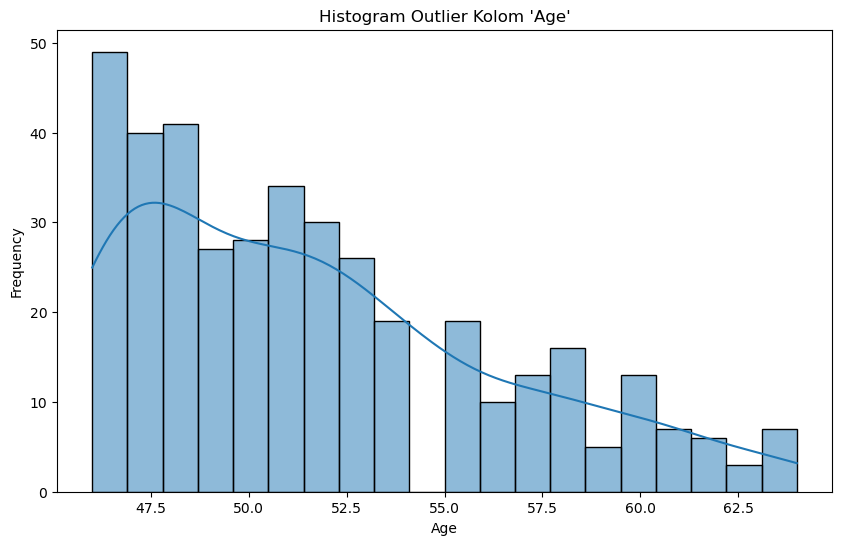

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = loan['Age'].quantile(0.25)
Q3 = loan['Age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers_age = loan[loan['Age'] > upper_bound]

plt.figure(figsize=(10, 6))
sns.histplot(data=outliers_age, x='Age', bins=20, kde=True)
plt.title("Histogram Outlier Kolom 'Age'")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


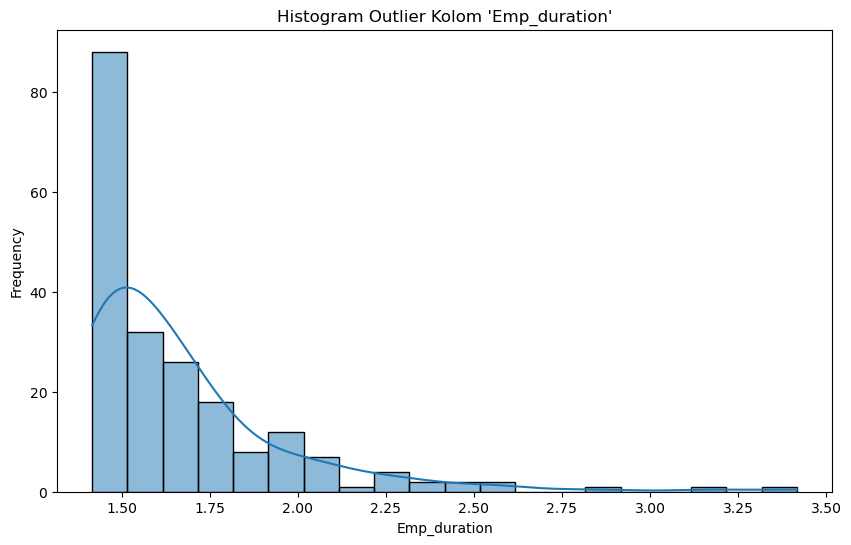

In [16]:
Q1 = loan['Emp_duration'].quantile(0.25)
Q3 = loan['Emp_duration'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers_Emp_duration = loan[loan['Emp_duration'] > upper_bound]

plt.figure(figsize=(10, 6))
sns.histplot(data=outliers_Emp_duration, x='Emp_duration', bins=20, kde=True)
plt.title("Histogram Outlier Kolom 'Emp_duration'")
plt.xlabel("Emp_duration")
plt.ylabel("Frequency")
plt.show()

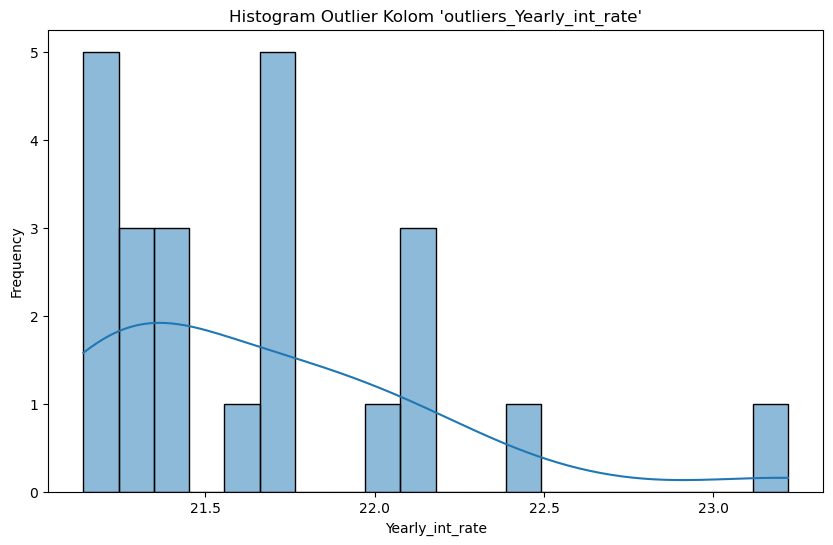

In [17]:
Q1 = loan['Yearly_int_rate'].quantile(0.25)
Q3 = loan['Yearly_int_rate'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers_Yearly_int_rate = loan[loan['Yearly_int_rate'] > upper_bound]

plt.figure(figsize=(10, 6))
sns.histplot(data=outliers_Yearly_int_rate, x='Yearly_int_rate', bins=20, kde=True)
plt.title("Histogram Outlier Kolom 'outliers_Yearly_int_rate'")
plt.xlabel("Yearly_int_rate")
plt.ylabel("Frequency")
plt.show()

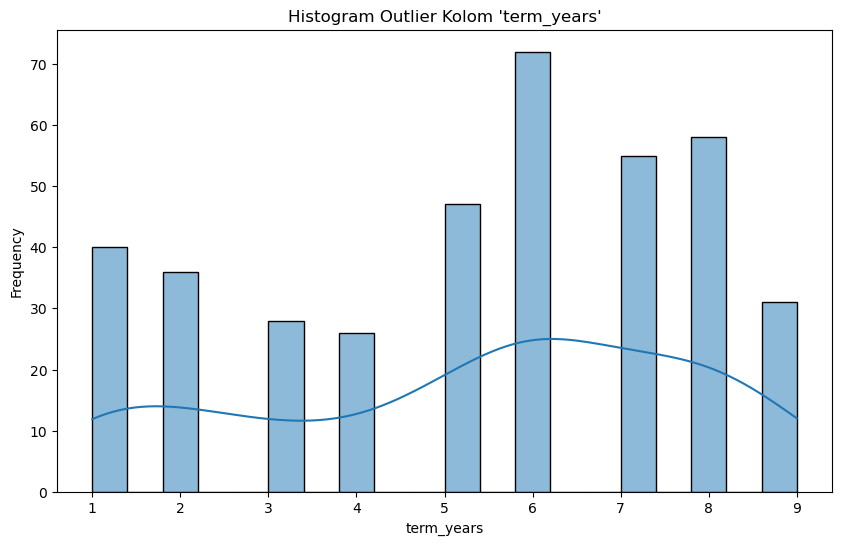

In [18]:
Q1 = loan['term_years'].quantile(0.25)
Q3 = loan['term_years'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers_term_years = loan[loan['term_years'] > upper_bound]

plt.figure(figsize=(10, 6))
sns.histplot(data=outliers_age, x='term_years', bins=20, kde=True)
plt.title("Histogram Outlier Kolom 'term_years'")
plt.xlabel("term_years")
plt.ylabel("Frequency")
plt.show()

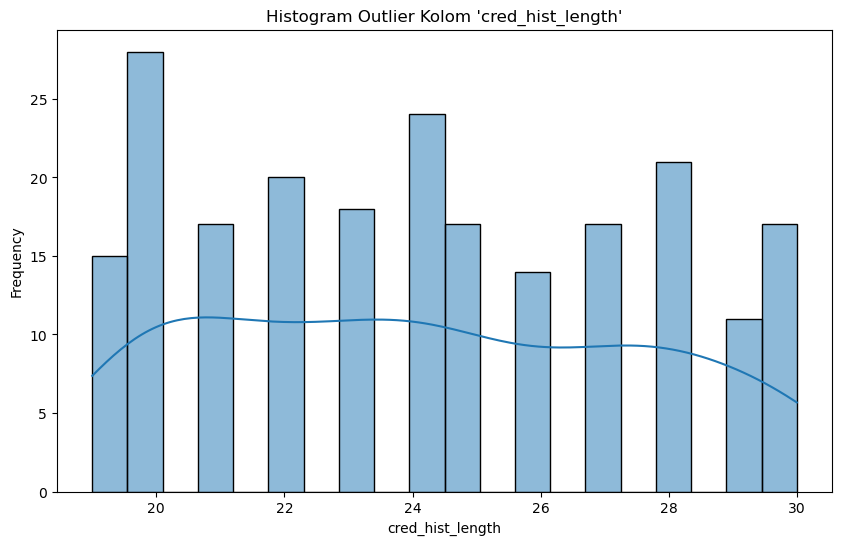

In [19]:
Q1 = loan['cred_hist_length'].quantile(0.25)
Q3 = loan['cred_hist_length'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers_cred_hist_length = loan[loan['cred_hist_length'] > upper_bound]

plt.figure(figsize=(10, 6))
sns.histplot(data=outliers_cred_hist_length, x='cred_hist_length', bins=20, kde=True)
plt.title("Histogram Outlier Kolom 'cred_hist_length'")
plt.xlabel("cred_hist_length")
plt.ylabel("Frequency")
plt.show()

In [20]:
"""loan.to_csv('loan_new.csv', index='False')"""

"loan.to_csv('loan_new.csv', index='False')"

In [21]:
loan = pd.read_csv('loan_new.csv')
loan.head()

,ID,Age,Income,Home_own,Emp_duration,Loan_purpose,Grade,Req_loan_amount,Yearly_int_rate,term_years,historical_default,cred_hist_length,Stats_loan
0,1,22,59000,RENT,1.000000,PERSONAL,C,35000,16.02,10,Y,3,DEFAULT
1,3,25,9600,MORTGAGE,0.083333,MEDICAL,B,5500,12.87,5,N,3,DEFAULT
2,4,23,65500,RENT,0.333333,MEDICAL,B,35000,15.23,10,N,2,DEFAULT
3,5,24,54400,RENT,0.666667,MEDICAL,B,35000,14.27,10,Y,4,DEFAULT
4,6,21,9900,OWN,0.166667,VENTURE,A,2500,7.14,1,N,2,DEFAULT


In [22]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  10416 non-null  int64  
 1   Age                 10416 non-null  int64  
 2   Income              10416 non-null  object 
 3   Home_own            10416 non-null  object 
 4   Emp_duration        10416 non-null  float64
 5   Loan_purpose        10416 non-null  object 
 6   Grade               10416 non-null  object 
 7   Req_loan_amount     10416 non-null  int64  
 8   Yearly_int_rate     10416 non-null  float64
 9   term_years          10416 non-null  int64  
 10  historical_default  10416 non-null  object 
 11  cred_hist_length    10416 non-null  int64  
 12  Stats_loan          10416 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


In [23]:
loan['Income'] = pd.to_numeric(loan['Income'], errors='coerce')
loan['Req_loan_amount'] = pd.to_numeric(loan['Req_loan_amount'], errors='coerce')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  10416 non-null  int64  
 1   Age                 10416 non-null  int64  
 2   Income              10413 non-null  float64
 3   Home_own            10416 non-null  object 
 4   Emp_duration        10416 non-null  float64
 5   Loan_purpose        10416 non-null  object 
 6   Grade               10416 non-null  object 
 7   Req_loan_amount     10416 non-null  int64  
 8   Yearly_int_rate     10416 non-null  float64
 9   term_years          10416 non-null  int64  
 10  historical_default  10416 non-null  object 
 11  cred_hist_length    10416 non-null  int64  
 12  Stats_loan          10416 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 1.0+ MB


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

loan['Home_own'] = label_encoder.fit_transform(loan['Home_own'])
loan['Loan_purpose'] = label_encoder.fit_transform(loan['Loan_purpose'])
loan['Grade'] = label_encoder.fit_transform(loan['Grade'])
loan['historical_default'] = label_encoder.fit_transform(loan['historical_default'])
loan['Stats_loan'] = label_encoder.fit_transform(loan['Stats_loan'])

In [25]:
correlation = loan.corr()
print(correlation)

                          ID       Age    Income  Home_own  Emp_duration  \
ID                  1.000000  0.781622  0.131552 -0.151852      0.191280   
Age                 0.781622  1.000000  0.140415 -0.084896      0.180365   
Income              0.131552  0.140415  1.000000 -0.170878      0.122411   
Home_own           -0.151852 -0.084896 -0.170878  1.000000     -0.231398   
Emp_duration        0.191280  0.180365  0.122411 -0.231398      1.000000   
Loan_purpose        0.039195  0.042317  0.010140  0.004582      0.003318   
Grade               0.197502  0.079771  0.090364 -0.040315      0.004601   
Req_loan_amount     0.019952  0.017278  0.122417 -0.051971      0.069430   
Yearly_int_rate    -0.084108 -0.165860  0.065491 -0.035207     -0.041945   
term_years          0.069296  0.087920  0.045263  0.000223      0.067913   
historical_default -0.109519 -0.170917  0.062925 -0.074900     -0.013409   
cred_hist_length    0.790776  0.893664  0.130627 -0.076132      0.164258   
Stats_loan  

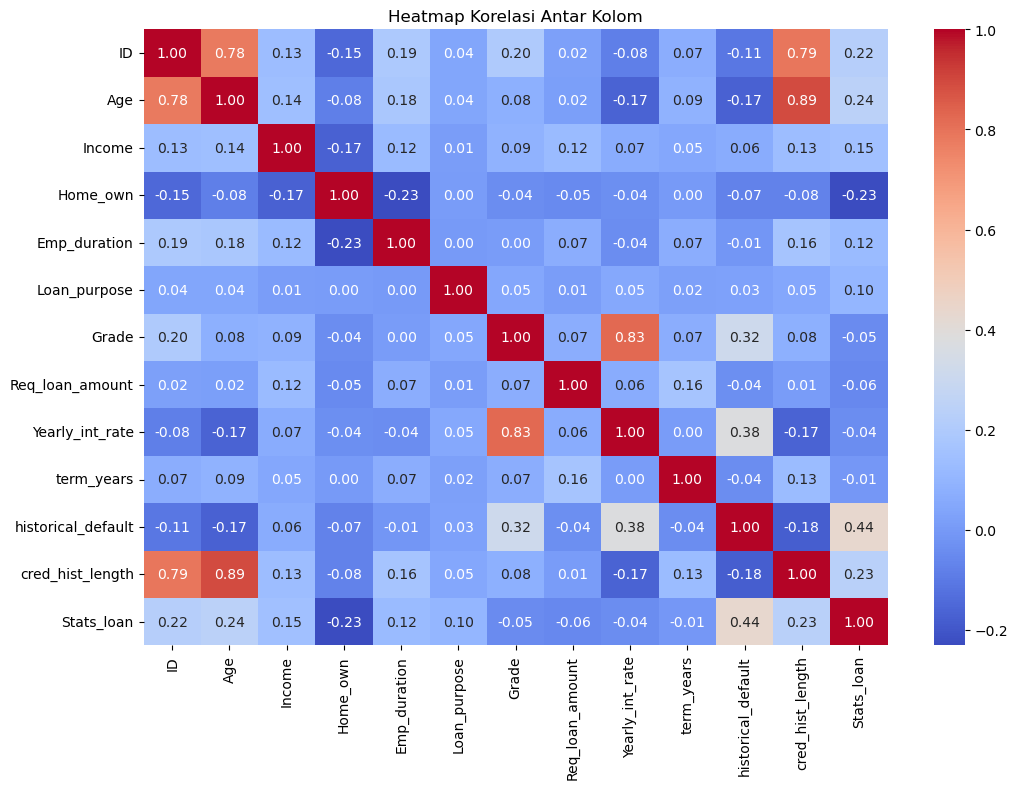

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

In [27]:
correlation_with_stats_loan = correlation['Stats_loan']

sorted_correlation = correlation_with_stats_loan.sort_values(ascending=False)

print(sorted_correlation)

Stats_loan            1.000000
historical_default    0.435396
Age                   0.242266
cred_hist_length      0.234716
ID                    0.221697
Income                0.147156
Emp_duration          0.123052
Loan_purpose          0.104370
term_years           -0.008512
Yearly_int_rate      -0.042800
Grade                -0.048330
Req_loan_amount      -0.057991
Home_own             -0.228007
Name: Stats_loan, dtype: float64


In [37]:
correlation_with_req_loan_amount = correlation['Req_loan_amount']

sorted_correlation = correlation_with_req_loan_amount.sort_values(ascending=False)

print(sorted_correlation)

Req_loan_amount       1.000000
term_years            0.163320
Income                0.122417
Emp_duration          0.069430
Grade                 0.067318
Yearly_int_rate       0.062392
ID                    0.019952
Age                   0.017278
Loan_purpose          0.010660
cred_hist_length      0.008422
historical_default   -0.035413
Home_own             -0.051971
Stats_loan           -0.057991
Name: Req_loan_amount, dtype: float64


In [29]:
loan.shape

(10416, 13)

In [30]:
loan.isna().sum()
loan.dropna(inplace=True)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = loan.drop('Stats_loan', axis=1)
y = loan['Stats_loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9121459433509361
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1204
           1       0.87      0.94      0.90       879

    accuracy                           0.91      2083
   macro avg       0.91      0.92      0.91      2083
weighted avg       0.92      0.91      0.91      2083



In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X2 = loan.drop('Req_loan_amount', axis=1)
y2 = loan['Req_loan_amount']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X2_train, y2_train)

LinearRegression()

In [36]:
y2_pred = model.predict(X2_test)
mse = mean_squared_error(y2_test, y_pred)
print('Mean Squared Error :', mse)

Mean Squared Error : 161407841.83869419
